In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np , pandas as pd
from sklearn.cluster import KMeans
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt
import umap

In [31]:
fac_var = ['CNT_CONTACT_POS', 'CNT_ENG', 'DAYS_CONTACT_POS', 'DAYS_CALL_PAYMENT', 'EWS_C_N_P27000100', 'EWS_C_N_P42000200', 'C_N_PS0001777', 'A_K_D10220000_OPR', 'DAYS_CONTACT', 'MOB', 'EWS_C_K_D10220000_OPR', 'EWS_C_K_D10210D00_OPR', 'target']
num_var = ['SCORE_ORG', 'SCORE_NK0200_000', 'SCORE_RK0400_700', 'EWS_A_K_D1M232000_OPR', 'EWS_C_N_P32003000', 'AGE', 'CNT_Contact', 'EWS_A_K_D1M23200C_OPR', 'EWS_C_K_D10310000_OPR', 'EWS_A_K_D90232200_OPR', 'D_N_CA0000603', 'EWS_C_N_P32002600', 'EWS_D_N_P43004000', 'SCORE_RK0400_000', 'D_K_D10310000_OPR', 'D_K_L2Z000034', 'D_K_L20283000', 'EWS_D_K_L20283000', 'EWS_D_N_P43004500', 'D_K_L2Z000035', 'EWS_A_K_D10231000_OPR', 'EWS_D_K_L2Z000035', 'SC0000059', 'D_N_L24003800', 'SC0000063', 'EWS_A_K_D10232000_OPR', 'TF_N_CRT000021', 'SC0000055', 'SC0000049', 'D_N_P21010500', 'EWS_C_K_D10110000_OPR', 'EWS_A_N_L22002000']
col = fac_var + num_var

In [66]:


import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,23 mins 33 secs
H2O cluster timezone:,Asia/Seoul
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_gpuadmin_u66awo
H2O cluster total nodes:,1
H2O cluster free memory:,16.26 Gb
H2O cluster total cores:,32
H2O cluster allowed cores:,32
H2O cluster status:,"locked, healthy"


In [71]:
#real = h2o.import_file(path='./credit44_sc.csv' ,col_names=col)


real = pd.read_csv('./credit44_sc.csv' ,usecols=col)
y = "target"
real  = h2o.H2OFrame(real)
real[y] = real[y].asfactor()
x = list(real.columns)

x = x[:-1]
real = real.na_omit()
train_r , test_r = real.split_frame(ratios=[0.75], seed=1)
from h2o.estimators.gbm import H2OGradientBoostingEstimator
model_r = H2OGradientBoostingEstimator(distribution='bernoulli',
                                       balance_classes = True ,
                                       stopping_metric = "misclassification" ,
                                       ntrees=100,
                                       max_depth=4,
                                       learn_rate=0.01)

model_r.train(x=x, y=y, training_frame=train_r, validation_frame=test_r)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [72]:
model_r.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30904072361076235: 


,0,1,Error,Rate
0,2885.0,1719.0,0.3734,(1719.0/4604.0)
1,726.0,3889.0,0.1573,(726.0/4615.0)
Total,3611.0,5608.0,0.2652,(2445.0/9219.0)


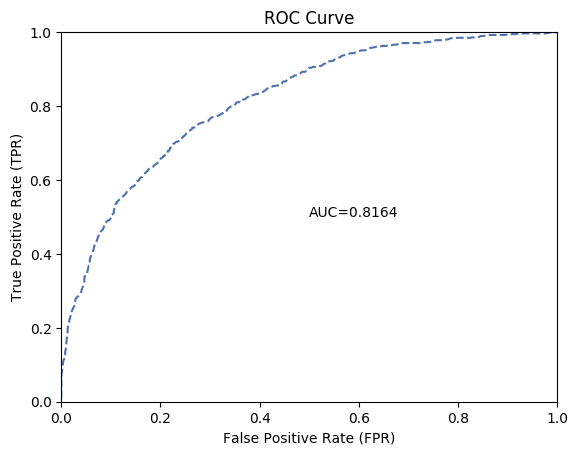

In [83]:
perf = model_r.model_performance(test_r)
perf.plot()

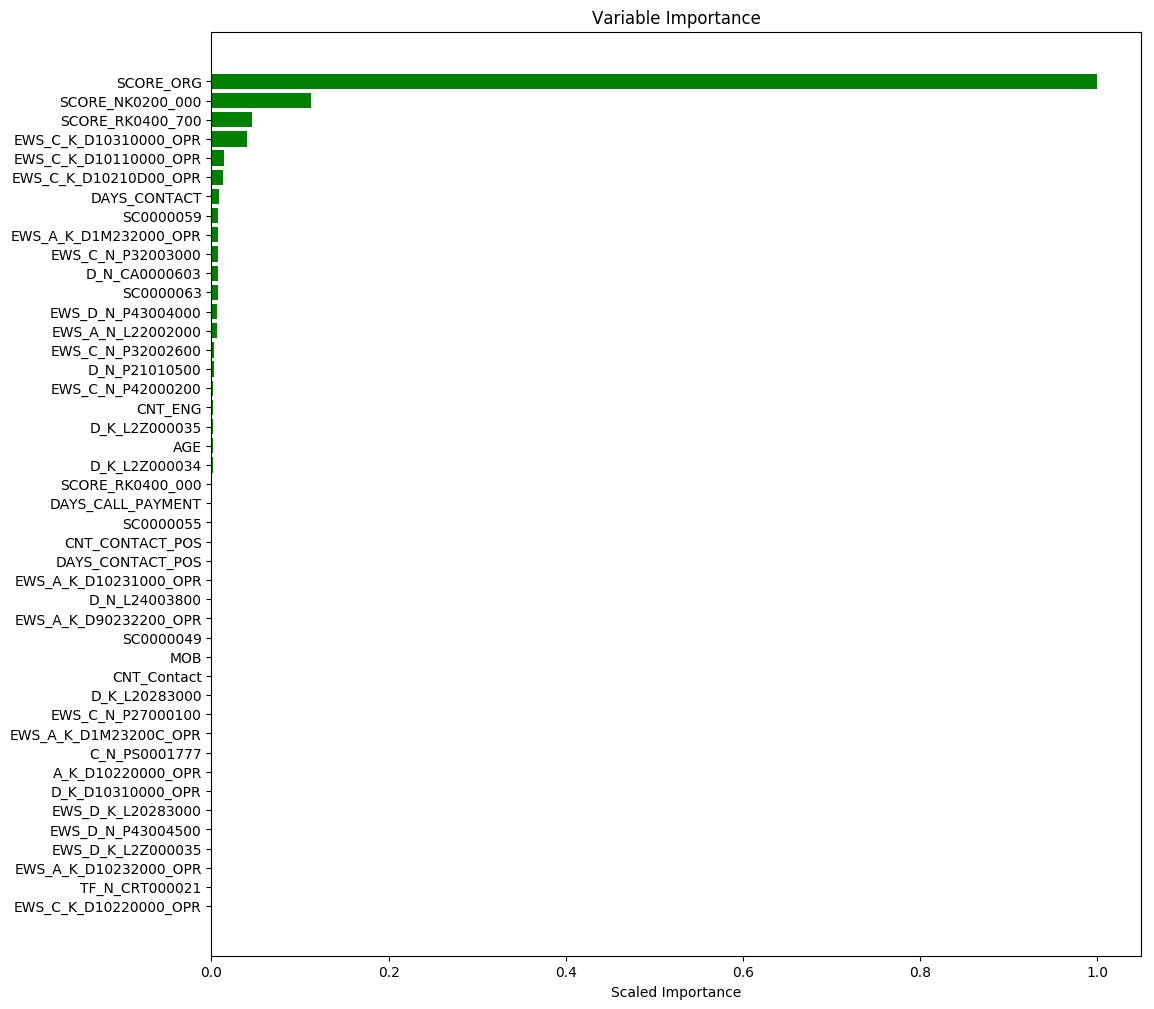

In [103]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (12,12))
variables = model_r._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model_r._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

In [77]:
fake = pd.read_csv('./SN_M_W_Res_Generated.csv',usecols =col)
y = "target"
fake  = h2o.H2OFrame(fake)
fake[y] = fake[y].asfactor()
x = list(real.columns)

x = x[:-1]
fake = fake.na_omit()
train, test = fake.split_frame(ratios=[0.75], seed=1)
from h2o.estimators.gbm import H2OGradientBoostingEstimator
model = H2OGradientBoostingEstimator(distribution='bernoulli',
                                     balance_classes = True ,
                                     stopping_metric = "misclassification" ,
                                     ntrees=100,
                                     max_depth=4,
                                     learn_rate=0.01)

model.train(x=x, y=y, training_frame=train, validation_frame=test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [78]:
model.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3329426447325751: 


,0,1,Error,Rate
0,1958.0,412.0,0.1738,(412.0/2370.0)
1,271.0,2078.0,0.1154,(271.0/2349.0)
Total,2229.0,2490.0,0.1447,(683.0/4719.0)


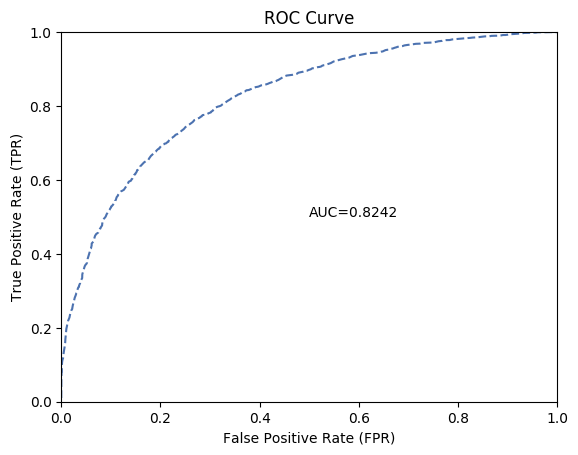

In [96]:
model_r.model_performance().plot()

실제데이터 모델로 실제 데이터를 예측할 때
 
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3596510113494455: 


,0,1,Error,Rate
0,1125.0,404.0,0.2642,(404.0/1529.0)
1,236.0,677.0,0.2585,(236.0/913.0)
Total,1361.0,1081.0,0.2621,(640.0/2442.0)


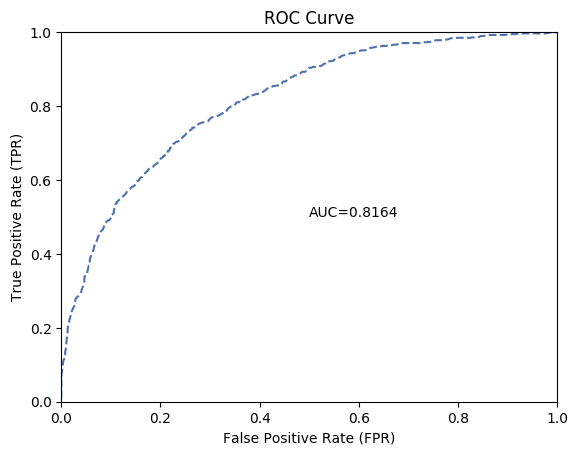

 
 
실제데이터 모델로 가짜 데이터를 예측할 때
 
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35656388289756624: 


,0,1,Error,Rate
0,574.0,192.0,0.2507,(192.0/766.0)
1,135.0,337.0,0.286,(135.0/472.0)
Total,709.0,529.0,0.2641,(327.0/1238.0)


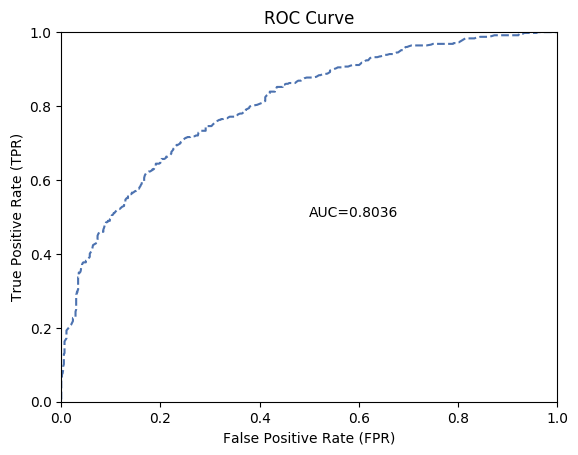

In [104]:
"""
실제데이터 모델로 가짜 데이터를 예측할 때
"""
print("실제데이터 모델로 실제 데이터를 예측할 때")
print(" ")
perf = model_r.model_performance(test_r)
print(perf.confusion_matrix())
perf.plot()
print(" ")
print(" ")
print("실제데이터 모델로 가짜 데이터를 예측할 때")
print(" ")
perf = model_r.model_performance(test)
print(perf.confusion_matrix())
perf.plot()

###  실제 모델로 가짜 데이터와 예측 데이터를 넣을 때 거의 같은 성능을 보인다.

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33070049089892817: 


,0,1,Error,Rate
0,622.0,144.0,0.188,(144.0/766.0)
1,68.0,404.0,0.1441,(68.0/472.0)
Total,690.0,548.0,0.1712,(212.0/1238.0)


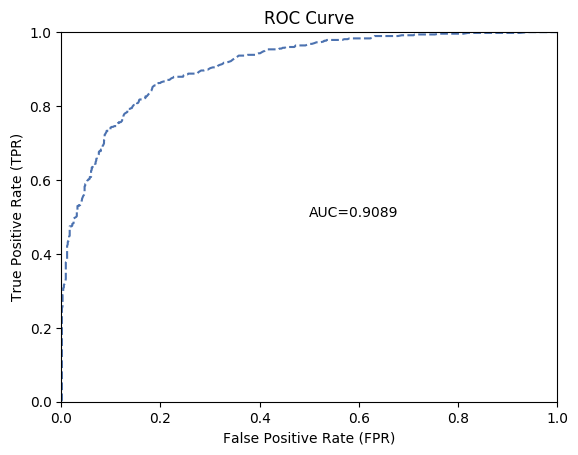

In [84]:
"""
가짜 모델로 가짜 데이터를 예측할 때
"""
perf = model.model_performance(test)
print(perf.confusion_matrix())
perf.plot()

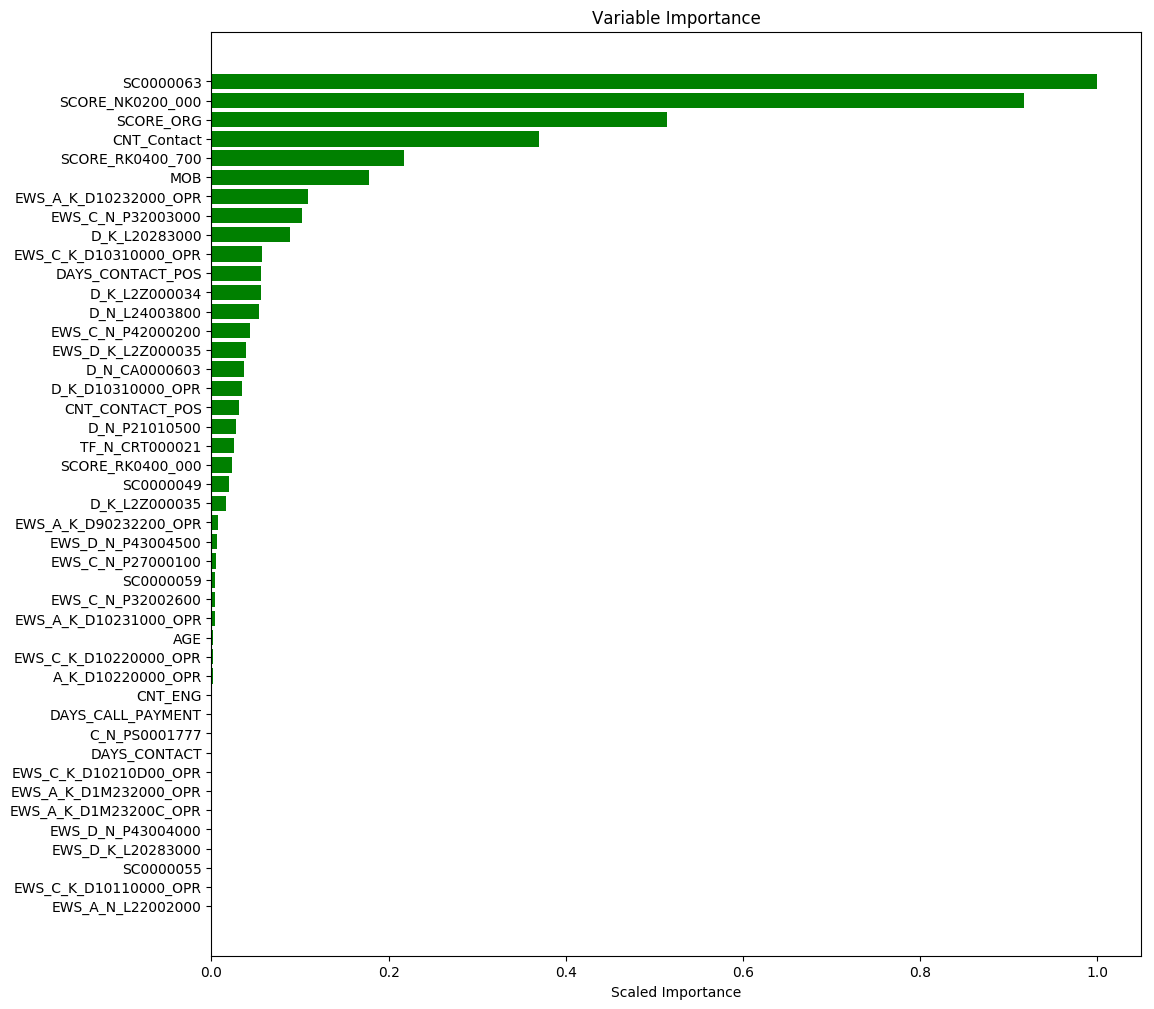

In [102]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (12,12))
variables = model._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = model._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

In [98]:
real = pd.read_csv('./credit44_sc.csv' ,usecols=col)
fake = pd.read_csv('./SN_M_W_Res_Generated.csv',usecols =col)
real["Real"] = 0
fake["Real"] = 1
#fake = pd.read_csv('./SN_M_W_Res_Generated.csv')
output = pd.concat([real, fake])
Target = output["Real"]
output.drop(["Real"] , inplace = True , axis = 1 )
X = output.values

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [99]:
output.reset_index(drop=True,inplace=True)

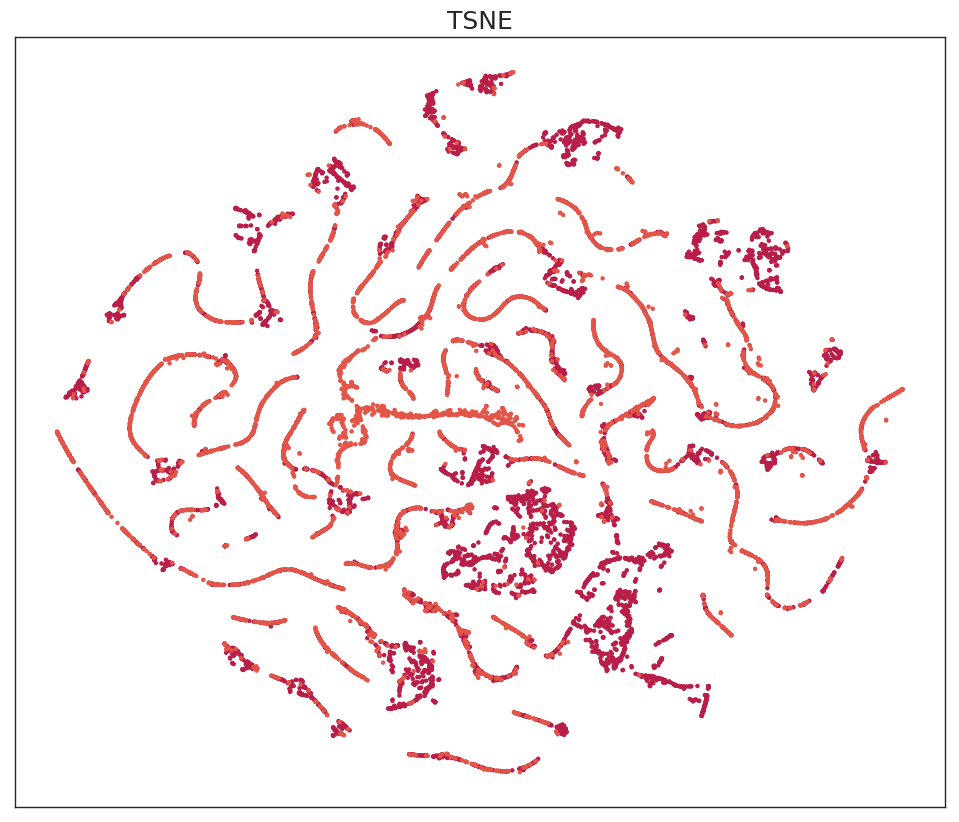

In [100]:
sns.set(context="paper", style="white")
tsne = TSNE(n_jobs=20)
embeddings = tsne.fit_transform(X)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(vis_x, vis_y, c=Target.values, cmap="Spectral", marker='.')
plt.setp(ax, xticks=[], yticks=[])
plt.title("TSNE", fontsize=18)
plt.clim(-0.5, 9.5)
plt.show()

/home/gpuadmin/.local/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


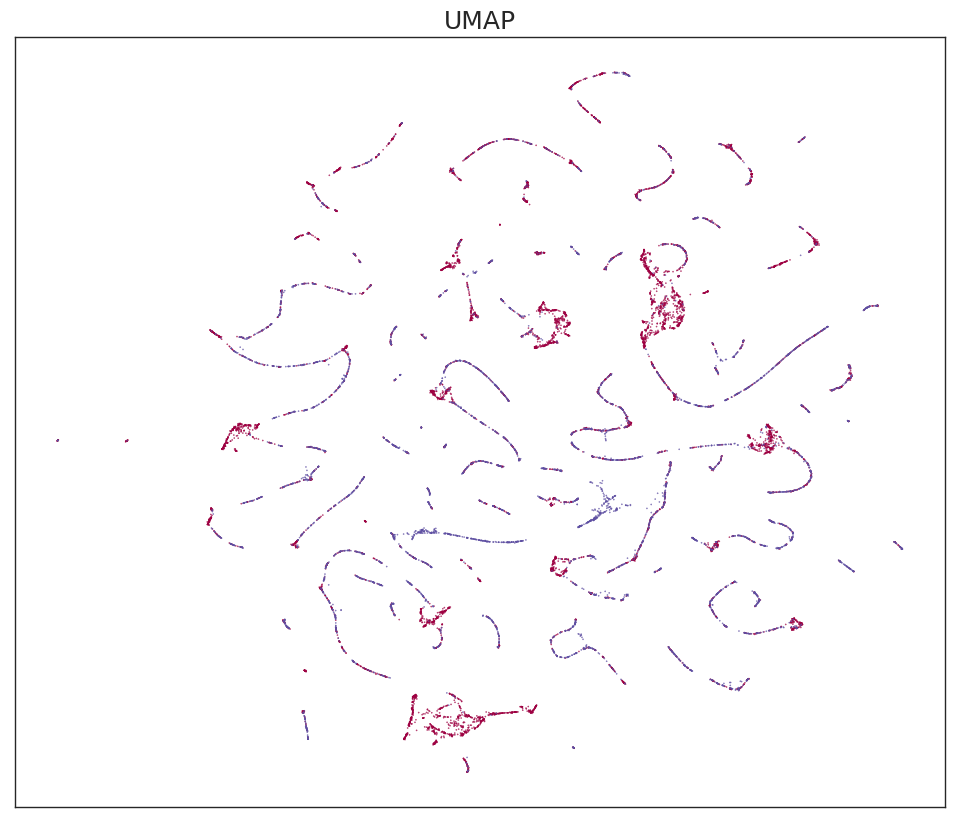

In [101]:
sns.set(context="paper", style="white")
reducer = umap.UMAP(random_state=42,)
embedding = reducer.fit_transform(X)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=Target.values, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("UMAP", fontsize=18)

plt.show()

In [52]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [62]:
X = embedding
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = Target.values